<a href="https://colab.research.google.com/github/anandababugudipudi/Pre-Owned-Car-Price-Prediction-Deployment-on-Heroku/blob/main/Car_Price_Prediction_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import pandas as pd
import numpy as np

In [157]:
df = pd.read_csv("car data.csv")

In [158]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [159]:
df.shape

(301, 9)

In [160]:
cat_cols = ["Seller_Type", "Transmission", "Owner", "Fuel_Type"]
for col in cat_cols:
    print(df[col].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [161]:
# Check for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

No missing values in the dataset

In [162]:
# Checking for numerical description of Dataframe
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [163]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [164]:
final_dataset['Current_Year'] = 2021

In [165]:
final_dataset['Num_Years'] = final_dataset['Current_Year'] - final_dataset['Year']

In [166]:
final_dataset.drop(['Year', 'Current_Year'], axis = 1, inplace = True)

In [167]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Categorical Encoding 

In [168]:
final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [169]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [170]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Num_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


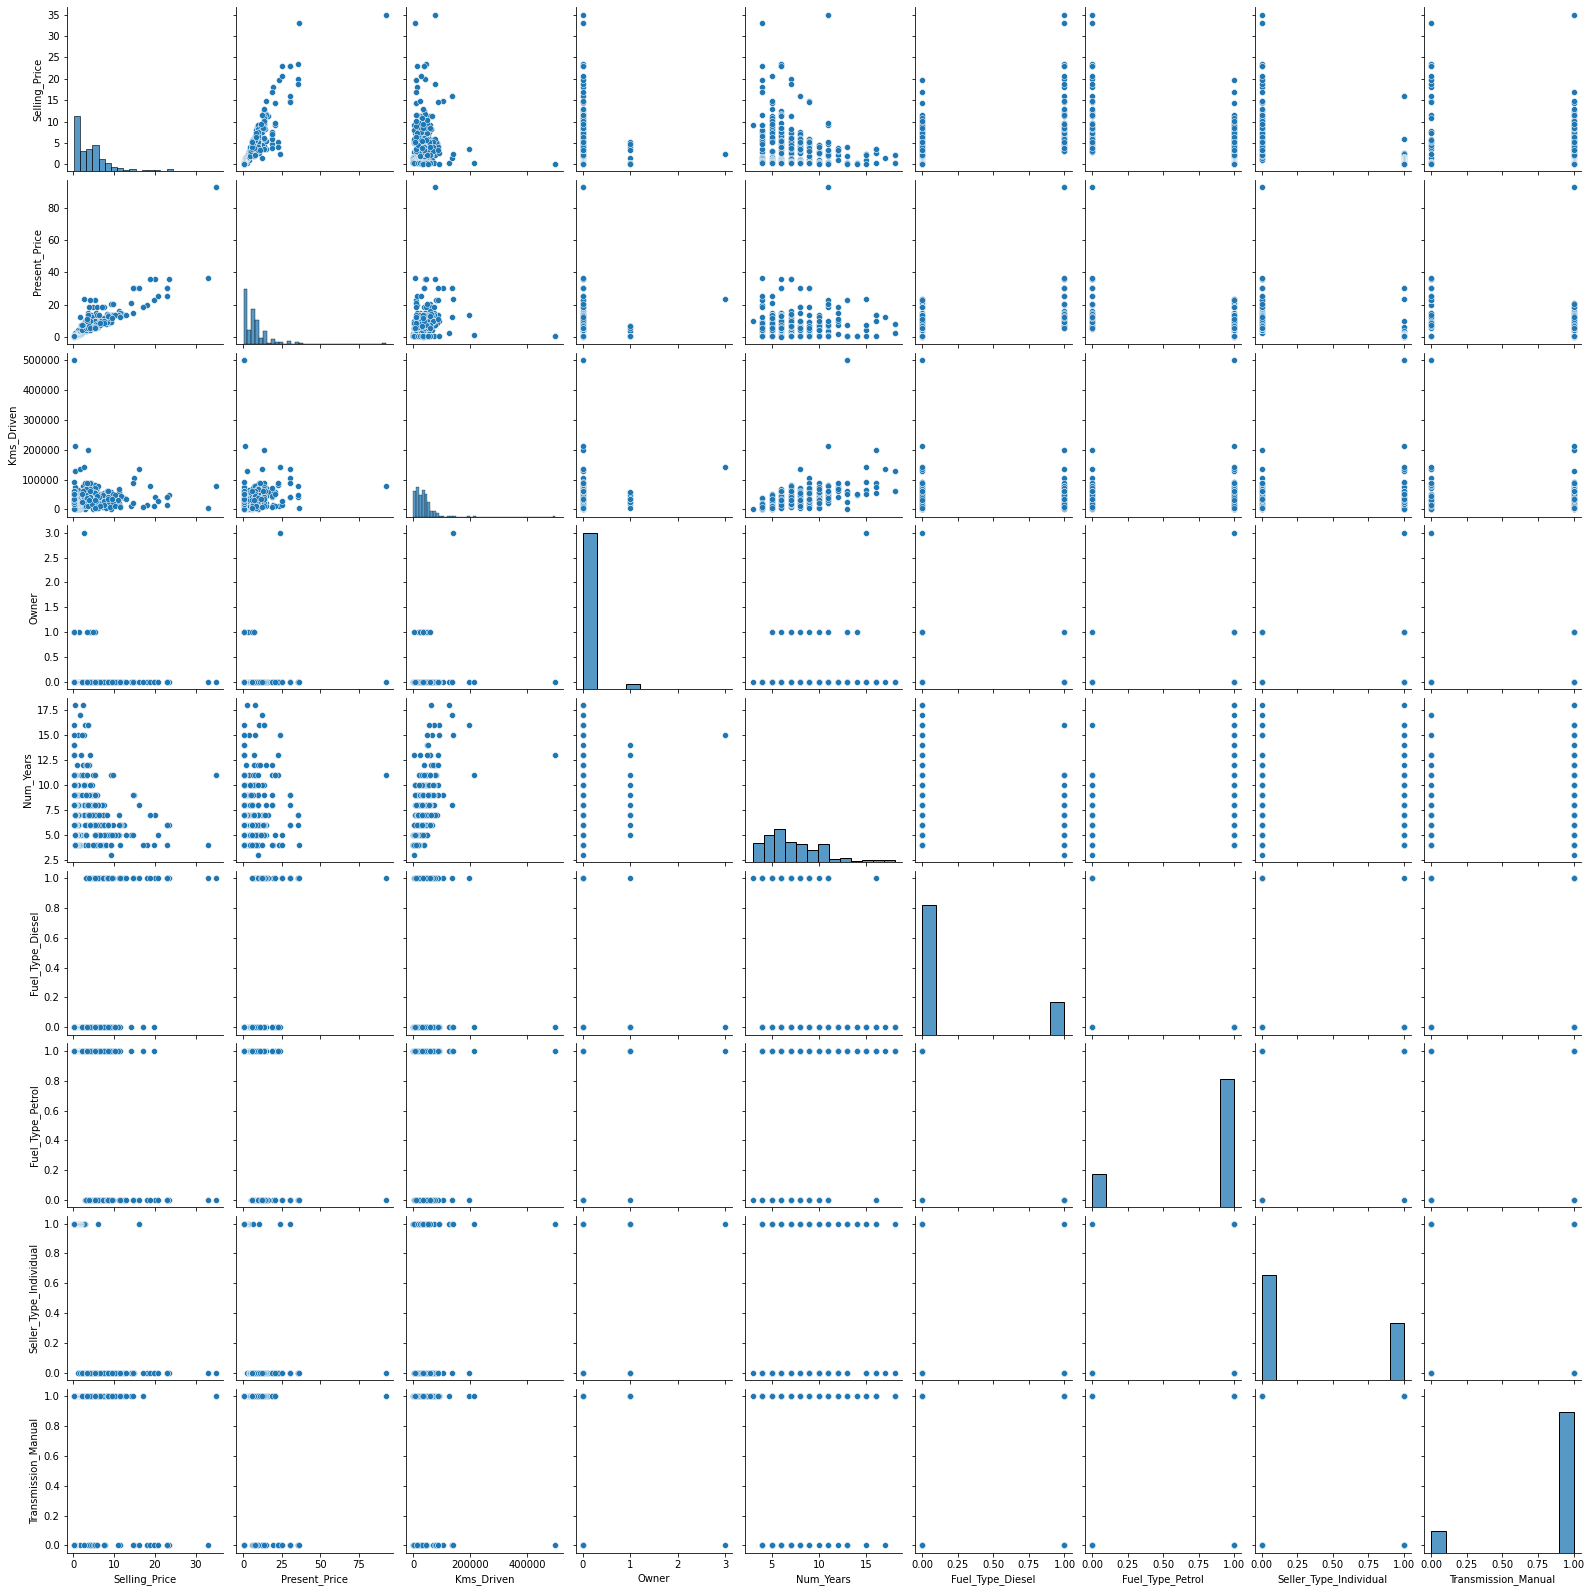

In [171]:
import seaborn as sns
#sns.pairplot(final_dataset)

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

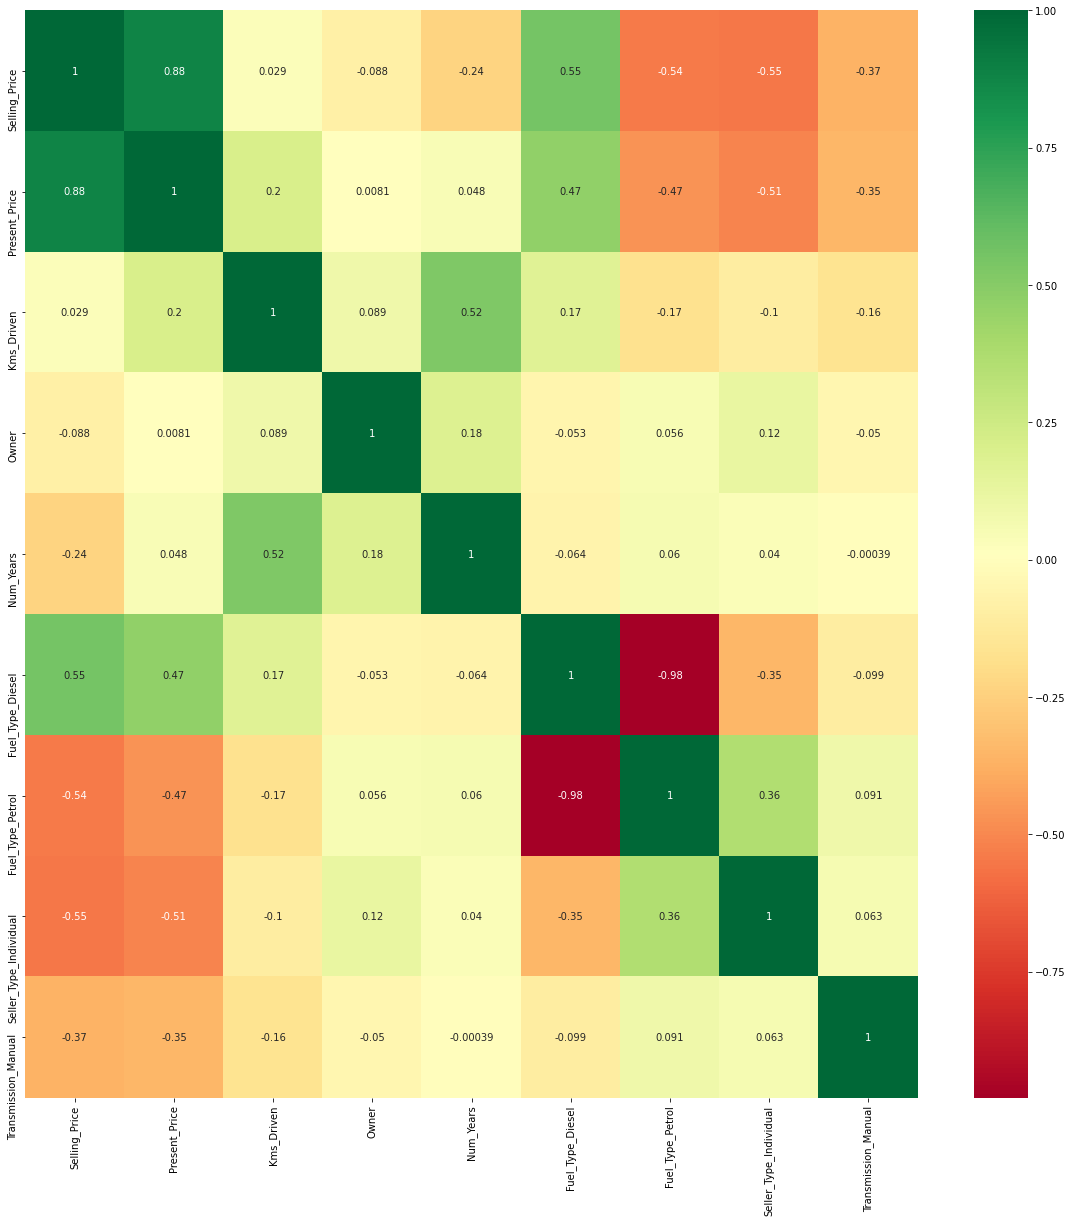

In [173]:
corrmat=final_dataset.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
# Plot heat map 
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [174]:
# Features and Labels
X = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:, 0]

In [175]:
# Feature Importance finding
from sklearn.tree import ExtraTreeRegressor
model = ExtraTreeRegressor()
model.fit(X, y)

ExtraTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                   max_features='auto', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, random_state=None,
                   splitter='random')

In [176]:
print(model.feature_importances_)

[2.22823593e-01 4.18623017e-02 2.00909855e-03 6.24595924e-02
 3.05078690e-01 1.44460875e-05 1.54537255e-01 2.11215023e-01]


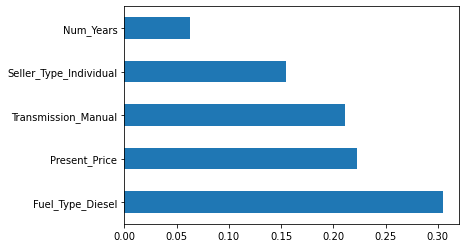

In [177]:
# Plot the graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

In [178]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [209]:
# Model Creation
import xgboost as xgb
from sklearn.metrics import explained_variance_score

model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bynode=1, colsample_bytree=1, gamma=0,
                       importance_type='gain', learning_rate=0.1, max_delta_step=0,
                       max_depth=4, min_child_weight=6, missing=None, n_estimators=120,
                       n_jobs=1, nthread=None, random_state=124,
                       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
                       silent=None, subsample=0.75, verbosity=1, objective='reg:squarederror')

In [210]:
# Training the Model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=6, missing=None, n_estimators=120,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=124, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, silent=None, subsample=0.75, verbosity=1)

In [211]:
# Making predictions on Model
predictions = model.predict(X_test)

# Evaluating the Model
score = explained_variance_score(predictions, y_test)
print(f"Score: {score}")

Score: 0.9202353515644432


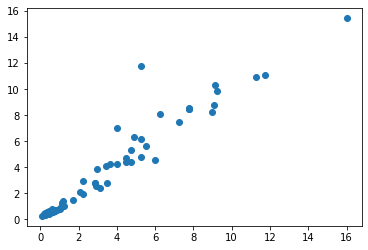

In [212]:
plt.scatter(y_test, predictions)

In [213]:
# Pickle the file
import pickle
# Open a file where we want to store the data
file = open('XGBoost_model.pkl', 'wb')
# Dump the info into the file
pickle.dump(model, file)